In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def helper1(win_votes, lose_votes, third_votes, third_EVs):
    if np.isnan(third_EVs) ==True:
        return win_votes - lose_votes
    else:
        return max(third_votes,win_votes) - lose_votes
    
def helper2(winner, loser, third, winEV, loseEV, thirdEV):
    if max(winEV, loseEV, thirdEV) == winEV:
        return winner
    if max(winEV, loseEV, thirdEV) == loseEV:
        return loser
    else:
        return third

In [3]:
def format_data(raw, year, winner, loser, corrections=False, offset=(0,0), third_party=False,faithless=False):
    s, e = 9,60
    col_nums = [0,1,2,4,5,7,8,10]
    
    if third_party == False:
        col_nums = [0,1,2,4,5,7]
    
    if offset==0:
        election = raw[0].iloc[s:e,col_nums]
    else:
        s += offset[0]
        e += offset[1]
        election = raw[0].iloc[s:e,col_nums]
    
    if third_party == False:
        election.columns = ['State', 'Total_votes', 'Winner_votes','Winner_EVs','Loser_votes',\
                            'Loser_EVs'] 
    else:
        election.columns = ['State', 'Total_votes', 'Winner_votes','Winner_EVs','Loser_votes',\
                            'Loser_EVs','3rd_votes','3rd_EVs']
    
    election.index = election['State']
    election.drop(['State'],axis=1,inplace=True)
    cols = election.columns[0:]
    for i in cols:
         election[i] = pd.to_numeric(election[i], errors ='coerce')
    
    
    if third_party == False:
        election['3rd_votes']= 0
        election['3rd_EVs']= 0
        
    if faithless == False:
        election['Faithless_EVs'] = 0

    else:
        election['Faithless_EVs'] = election.index.map(faithless)
        
    if corrections != False:
        for i in range(len(corrections)):
            election.at[corrections[i][0],corrections[i][1]] = corrections[i][2]
        
    election.fillna(0,inplace=True)
        
    election['Other Votes'] = election['Total_votes'] -election['Winner_votes'] - election['Loser_votes'] - election['3rd_votes']
    
    election['Year'] = year
   
    f1 = lambda x: helper1(x['Winner_votes'], x['Loser_votes'], x['3rd_votes'], x['3rd_EVs'])
    election['Margin'] = election.apply(f1, axis=1)
    
    f2 = lambda x: helper2(winner, loser, third_party, x['Winner_EVs'], x['Loser_EVs'], x['3rd_EVs'])
    election['state_winner'] = election.apply(f2, axis=1)
         
    return election

In [4]:
def helper_winEV(winner_votes, loser_votes, EV):
    if winner_votes>loser_votes:
        return EV
    else:
        return 0

def helper_loseEV(winner_votes, loser_votes, EV):
    if winner_votes<loser_votes:
        return EV
    else:
        return 0
    
def helper_state_win(winner_votes, loser_votes):
    if winner_votes>loser_votes:
        return "Biden"
    else:
        return "Trump"    
    
in_file = pd.read_excel("Popular vote backend.xlsx")
election_2020 = in_file.iloc[4:,[0,3,4,5,13]]
election_2020.index = election_2020['state']
election_2020.drop(['state'],axis=1,inplace=True)
drop_rows = ['Nebraska 2nd District','Non-Battlegrounds','Nebraska 1st District', 'Nebraska 3rd District',\
'Maine 1st District','Maine 2nd District']
election_2020.drop(drop_rows,axis=0,inplace=True)
election_2020['Total_votes'] = election_2020['dem_votes'] + election_2020['rep_votes'] + election_2020['other_votes']
election_2020['Other Votes'] = election_2020['other_votes']
election_2020['Year'] =2020
election_2020['Faithless_EVs'] = 0
election_2020['3rd_votes'] = 0
election_2020['3rd_EVs'] = 0
election_2020['Winner_votes'] = election_2020['dem_votes']
election_2020['Loser_votes'] = election_2020['rep_votes']

f3 = lambda x: helper_winEV(x['Winner_votes'],x['Loser_votes'],x['EV'])
election_2020['Winner_EVs'] =election_2020.apply(f3, axis=1)

f4 = lambda x: helper_loseEV(x['Winner_votes'],x['Loser_votes'],x['EV'])
election_2020['Loser_EVs'] =election_2020.apply(f4, axis=1)


election_2020['Margin'] = election_2020['Winner_votes'] - election_2020['Loser_votes']
election_2020 = election_2020[['Total_votes', 'Winner_votes', 'Winner_EVs', 'Loser_votes', 'Loser_EVs',\
       '3rd_votes', '3rd_EVs', 'Faithless_EVs', 'Other Votes', 'Year','Margin']]


f5 = lambda x: helper_state_win(x['Winner_votes'], x['Loser_votes'])
election_2020['state_winner'] = election_2020.apply(f5, axis=1)

election_2020.at['Maine','Winner_EVs'] = 3 
election_2020.at['Maine','Loser_EVs'] =1
election_2020.at['Nebraska','Loser_EVs'] =4
election_2020.at['Nebraska','Winner_EVs'] =1 



In [5]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/2016")

winner = 'Trump'
loser = 'H Clinton'
third_party= 'G Johnson'

s, e = 14,68
col_nums = [0,1,2,4,5,7,8,10]
    
election_2016 = in_file[0].iloc[s:e,col_nums]
    
election_2016.columns = ['State', 'Total_votes', 'Loser_votes','Loser_EVs','Winner_votes',\
                            'Winner_EVs','3rd_votes','3rd_EVs']
    
election_2016.index = election_2016['State']
election_2016.drop(['State'],axis=1,inplace=True)

cols = election_2016.columns[0:]
for i in cols:
    election_2016[i] = pd.to_numeric(election_2016[i], errors ='coerce')
    
election_2016 = election_2016[['Total_votes', 'Winner_votes','Winner_EVs','Loser_votes',\
                            'Loser_EVs','3rd_votes','3rd_EVs']]

         
election_2016.fillna(0,inplace=True)

election_2016['Faithless_EVs'] = election_2016.index.map({'Texas':2, 'Washington':4,'Hawaii':1})


        
election_2016['Other Votes'] = election_2016['Total_votes'] -election_2016['Winner_votes'] - election_2016['Loser_votes'] - election_2016['3rd_votes']
    
election_2016['Year'] = 2016
 
election_2016.drop(index = ['CD-1','CD-2','CD-3'], inplace =True)

election_2016.at['Nebraska','Winner_EVs'] = 5 
election_2016.at['Washington','Loser_EVs'] =8
election_2016.at['Hawaii','Loser_EVs'] =3
election_2016.at['Texas','Winner_EVs'] =36    

f6 = lambda x: helper1(x['Winner_votes'], x['Loser_votes'], x['3rd_votes'], x['3rd_EVs'])
election_2016['Margin'] = election_2016.apply(f6, axis=1)
    
f7 = lambda x: helper2(winner, loser, third_party, x['Winner_EVs'], x['Loser_EVs'], x['3rd_EVs'])
election_2016['state_winner'] = election_2016.apply(f7, axis=1)




In [6]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/2012")

In [7]:
election_2012 = format_data(in_file, 2012, "Obama","Romney",offset=(2,2))

In [8]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/2008")

In [9]:
corr_2008=[('Nebraska','Loser_EVs',4), ('Nebraska','Winner_EVs',1)]

In [10]:
election_2008 = format_data(in_file, 2008, "Obama",'McCain',corrections=corr_2008)

In [11]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/2004")

In [12]:
corr_2004=[('Minnesota*','Loser_EVs',9)]
faith_2004 = {'Minnesota*':1}

In [13]:
election_2004 = format_data(in_file, 2004, "HW Bush", "Kerry",corrections=corr_2004,faithless=faith_2004)

In [14]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/2000")

In [15]:
corr_2000=[('Dist. of Col.*','Loser_EVs',2)]
faith_2000 = {'Dist. of Col.*':1}

In [16]:
election_2000 = format_data(in_file, 2000, "HW Bush","Gore",offset=(0,0),third_party="Nader",corrections=corr_2000,faithless=faith_2000)

In [17]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1996")

In [18]:
election_1996 = format_data(in_file, 1996,"B Clinton","Dole",third_party="Perot")

In [19]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1992")

In [20]:
election_1992 = format_data(in_file,1992,"B Clinton","H Bush", third_party="Perot")

In [21]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1988")

In [22]:
corr_1988 =[('West Virginia*','Loser_EVs',5)]
faith_1988 ={'West Virginia*':1}

In [23]:
election_1988 =format_data(in_file,1988,"H Bush", "Dukakis", offset=(1,1),corrections=corr_1988,faithless=faith_1988)

In [24]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1984")

In [25]:
election_1984 =format_data(in_file,1984,"Reagan", "Mondale", offset=(1,1))

In [26]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1980")

In [27]:
election_1980 =format_data(in_file,1980,"Reagan", "Carter", third_party="Anderson")

In [28]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1976")

election = in_file[1].iloc[5:56,[0,1,2,4,5,7]]
election.columns = ['State', 'Total_votes', 'Winner_votes','Winner_EVs','Loser_votes','Loser_EVs']
election.index = election['State']
election.drop(['State'],axis=1,inplace=True)
cols = election.columns[0:]
for i in cols:
    election[i] = pd.to_numeric(election[i], errors ='coerce')
election['3rd_votes']= 0
election['3rd_EVs']= 0
election['Faithless_EVs'] = election.index.map({'Washington*':1})

election.fillna(0,inplace=True)
        
election['Other Votes'] = election['Total_votes'] -election['Winner_votes'] - election['Loser_votes'] - election['3rd_votes']


election['Year'] = 1976

election.at['Washington*','Loser_EVs'] = 8

f8 = lambda x: helper1(x['Winner_votes'], x['Loser_votes'], x['3rd_votes'], x['3rd_EVs'])
election['Margin'] = election.apply(f8, axis=1)
    
f9 = lambda x: helper2("Carter", "Ford", False, x['Winner_EVs'], x['Loser_EVs'], x['3rd_EVs'])
election['state_winner'] = election.apply(f9, axis=1)

election_1976 = election



In [29]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1972")

In [30]:
corr_1972 =[('Virginia*','Winner_EVs',11)]
faith_1972 ={'Virginia*':1}

In [31]:
election_1972 = format_data(in_file,1972,"Nixon","McGovern",offset=(1,1),corrections=corr_1972,faithless=faith_1972)

In [32]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1968")

In [33]:
election_1968 = format_data(in_file,1968,"Nixon","Humphrey", third_party="Wallace")

In [34]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1964")

In [35]:
election_1964 = format_data(in_file,1964,"Johnson","Goldwater",offset=(1,1))

In [36]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1960")

winner = 'Kennedy'
loser = 'Nixon'
third_party= 'Byrd'

s, e = 9,59
col_nums = [0,1,2,4,5,7]
    
election_1960 = in_file[0].iloc[s:e,col_nums]
    
election_1960.columns = ['State', 'Total_votes', 'Winner_votes','Winner_EVs','Loser_votes',\
                            'Loser_EVs']
    
election_1960.index = election_1960['State']
election_1960.drop(['State'],axis=1,inplace=True)

cols = election_1960.columns[0:]
for i in cols:
    election_1960[i] = pd.to_numeric(election_1960[i], errors ='coerce')

election_1960['3rd_votes']= 0
election_1960['3rd_EVs']= 0
election_1960['Faithless_EVs'] = 0

election_1960.fillna(0,inplace=True)
        
election_1960['Other Votes'] = election_1960['Total_votes'] -election_1960['Winner_votes'] - election_1960['Loser_votes'] - election_1960['3rd_votes']
    
election_1960['Year'] = 1960

election_1960.at['Alabama*','Winner_EVs'] = 5
election_1960.at['Alabama*','3rd_EVs'] = 6
election_1960.at['Mississippi*','Winner_EVs'] = 0
election_1960.at['Mississippi*','3rd_EVs'] = 8
election_1960.at['Oklahoma*','Loser_EVs'] = 7
election_1960.at['Oklahoma*','3rd_EVs'] = 1

f10 = lambda x: helper1(x['Winner_votes'], x['Loser_votes'], x['3rd_votes'], x['3rd_EVs'])
election_1960['Margin'] = election_1960.apply(f10, axis=1)
    
f11 = lambda x: helper2(winner, loser, third_party, x['Winner_EVs'], x['Loser_EVs'], x['3rd_EVs'])
election_1960['state_winner'] = election_1960.apply(f11, axis=1)


In [37]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1956")

In [38]:
corr_1956 =[('Alabama*','Loser_EVs',10)]
faith_1956 ={'Alabama*':1}

In [39]:
election_1956 = format_data(in_file,1956,"Eisenhower", "Stevenson", offset=(2,-1), corrections = corr_1956,faithless=faith_1956)

In [40]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1952")  

In [41]:
election_1952 = format_data(in_file,1952,"Eisenhower", "Stevenson", offset=(2,-1))

In [42]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1948") 

In [43]:
election_1948 = format_data(in_file,1948,"Truman","Dewey", offset=(3,0),third_party="Thurmond")

In [44]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1944") 

In [45]:
election_1944 = format_data(in_file,1944,"F Roosevelt", "Dewey", offset=(2,-1))

In [46]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1940") 

In [47]:
election_1940 = format_data(in_file,1940,"F Roosevelt", "Willkie",offset=(2,-1))

In [48]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1936") 

In [49]:
election_1936 = format_data(in_file,1936,"F Roosevelt", "Landon",offset=(0,-3))

In [50]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1932") 

In [51]:
election_1932 = format_data(in_file,1932,"F Roosevelt", "Hoover",offset=(2,-1))

In [52]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1928") 

In [53]:
election_1928 = format_data(in_file,1928,"Hoover", "Smith", offset=(2,-1))

In [54]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1924") 

In [55]:
election_1924 = format_data(in_file,1924,"Coolidge", "Davis", offset=(1,-2),third_party="LaFollette")

In [56]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1920") 

In [57]:
election_1920 = format_data(in_file,1920,"Harding","Cox", offset=(0,-3))

In [58]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1916") 

In [59]:
election_1916 = format_data(in_file,1916,"Wilson","Hughes", offset=(0,-3))

In [60]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1912")

In [61]:
election_1912 = format_data(in_file,1912,"Wilson","T Roosevelt", offset=(2,-1),third_party="Taft")

In [62]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1908") 

In [63]:
election_1908 = format_data(in_file,1908,"Taft","Bryan", offset=(0,-5))

In [64]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1904") 

In [65]:
election_1904 = format_data(in_file,1904,"T Roosevelt","Parker", offset=(0,-6))

In [66]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1900") 

In [67]:
election_1900 = format_data(in_file,1900,"McKinley","Bryan", offset=(0,-6))

In [68]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1896") 

In [69]:
election_1896 = format_data(in_file,1896,"McKinley","Bryan", offset=(0,-6))

In [70]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1892") 

In [71]:
election_1892 = format_data(in_file,1892,"Cleveland","B Harrison", offset=(1,-6),third_party="Weaver")

In [72]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1888") 

In [73]:
election_1888 = format_data(in_file,1888,"B Harrison", "Cleveland",offset=(0,-13))

In [74]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1884") 

In [75]:
election_1884 = format_data(in_file,1884,"Cleveland","Blane", offset=(0,-13))

In [76]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1880") 

In [77]:
election_1880 = format_data(in_file,1880,"Garfield","Hancock",offset=(0,-13))

In [78]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1876") 

In [79]:
corr_1876 =[('Colorado','Winner_EVs',3)]

In [80]:
election_1876 = format_data(in_file,1876,"Hayes","Tilden",offset=(0,-13),corrections=corr_1876)

In [81]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1872") 

In [82]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1872") 

election_1872 = in_file[0].iloc[9:46,[0,1,2,4,5,7]]

election_1872.columns = ['State', 'Total_votes', 'Winner_votes','Winner_EVs','Loser_votes','Loser_EVs'] 

    
election_1872.index = election_1872['State']

election_1872.drop(['State'],axis=1,inplace=True)
cols = election_1872.columns[0:]
for i in cols:
    election_1872[i] = pd.to_numeric(election_1872[i], errors ='coerce')
       
election_1872['3rd_votes']= 0
election_1872['3rd_EVs']= 0
        
election_1872['Faithless_EVs'] = 0

election_1872.fillna(0,inplace=True)
        
election_1872['Other Votes'] = election_1872['Total_votes'] -election_1872['Winner_votes'] - election_1872['Loser_votes'] - election_1872['3rd_votes']
    
election_1872['Year'] = 1872
   
f12 = lambda x: helper1(x['Winner_votes'], x['Loser_votes'], x['3rd_votes'], x['3rd_EVs'])
election_1872['Margin'] = election_1872.apply(f12, axis=1)


def helper_state_win2(winner_votes, loser_votes):
    if winner_votes>loser_votes:
        return "Grant"
    else:
        return "Greeley"

f13 = lambda x: helper_state_win2(x['Winner_votes'], x['Loser_votes'])
election_1872['state_winner'] = election_1872.apply(f13, axis=1)

In [83]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1868") 

In [84]:
corr_1868 =[('Florida','Winner_EVs',3)]

In [85]:
election_1868 = format_data(in_file,1868,"Grant","Seymour",offset=(0,-17),corrections=corr_1868)

In [86]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1864") 

In [87]:
election_1864 = format_data(in_file,1864,"Lincoln","McClellan",offset=(0,-26))

In [88]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1860") 

In [89]:
election_1860 = format_data(in_file,1860,"Lincoln","Douglas",offset=(2,-16),third_party="Breckenridge")

In [90]:
election_1860.at['Kentucky','state_winner'] = "Bell"
election_1860.at['Virginia','state_winner'] = "Bell"
election_1860.at['Tennessee','state_winner'] = "Bell"

In [91]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1856") 

In [92]:
corr_1856 =[('South Carolina','Winner_EVs',8)]

In [93]:
election_1856 = format_data(in_file,1856,"Buchanon","Freemont",offset=(1,-19),corrections=corr_1856,third_party="Fillmore")

In [94]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1852") 

In [95]:
corr_1852 =[('South Carolina','Winner_EVs',9)]

In [96]:
election_1852 = format_data(in_file,1852,"Pierce","Scott",offset=(1,-19),corrections=corr_1852,third_party="Hale")

In [97]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1848") 

In [98]:
corr_1848 =[('South Carolina','Loser_EVs',9)]

In [99]:
election_1848 = format_data(in_file,1848,"Taylor","Cass",offset=(1,-20),corrections=corr_1848,third_party="Van Buren")

In [100]:
in_file = pd.read_html("https://www.presidency.ucsb.edu/statistics/elections/1844") 

In [101]:
corr_1844 =[('South Carolina','Winner_EVs',9)]

In [102]:
election_1844 = format_data(in_file,1844,"Polk","Clay",offset=(0,-25),corrections=corr_1844)

In [103]:
elections = [election_1844, election_1848, election_1852, election_1856, election_1860, election_1864, election_1868, \
             election_1872, election_1876,election_1880,election_1884, election_1888,election_1892,election_1896,\
             election_1900, election_1904, election_1908, election_1912, election_1916, election_1920,election_1924, \
             election_1928,election_1932,election_1936,election_1940, election_1944, election_1948, election_1952, \
             election_1956, election_1960, election_1964,election_1968, election_1972,election_1976,election_1980,\
             election_1984,election_1988,election_1992,election_1996, election_2000,election_2004,election_2008,\
             election_2012,election_2016,election_2020]
all_elections = pd.concat(elections)
len(elections)

45

In [177]:
all_elections.to_excel("All_presidential_results_extra.xlsx") 

In [145]:
party_dictionary = {'Taylor':"Whig",'Pierce':"Democrat",'Buchanon':"Democrat",'Lincoln':"Republican",\
                    'Polk':"Democrat",'Grant':"Republican",'Hayes':"Republican",'Garfield':"Republican",\
                    'B Harrison':"Republican",'Cleveland':"Democrat",'McKinley':"Republican",\
                    'T Roosevelt':"Republican",'Taft':"Republican",'Wilson':"Democrat",'Harding':"Republican",\
                 'Coolidge':"Republican",'Hoover':"Republican",'F Roosevelt':"Democrat",'Truman':"Democrat",\
                    'Eisenhower':"Republican",'Kennedy':"Democrat",'Johnson':"Democrat",'Nixon':"Republican",\
                    'Carter':"Democrat",'Reagan':"Republican",'H Bush':"Republican",'B Clinton':"Democrat",\
                    'HW Bush':"Republican",'Obama':"Democrat",'Trump':"Republican","Biden":"Democrat"}

In [146]:
def election_margins(df, winner, third_party=False):
    
    Faithless = df['Faithless_EVs'].sum()
    
    if Faithless == 0:
        states = 'N/A'
    else:    
        states = df[df['Faithless_EVs']>0].index.tolist()   
     
    total_votes = df['Total_votes'].sum()
    vote_margin = df['Winner_votes'].sum() - df['Loser_votes'].sum()
    vote_margin_pct = vote_margin/df['Total_votes'].sum()
    vote_pct = df['Winner_votes'].sum()/df['Total_votes'].sum()
    electoral_votes = df['Winner_EVs'].sum() + df['Loser_EVs'].sum()+ df['3rd_EVs'].sum() + df['Faithless_EVs'].sum() 
        
    electoral_votes_winner = df['Winner_EVs'].sum()
    electoral_margin = df['Winner_EVs'].sum() - df['Loser_EVs'].sum()
    electoral_margin_pct = electoral_margin/electoral_votes
    states_won = df[df['state_winner']==winner].shape[0]
    states_pct = states_won/df.shape[0]
    
    index = ['Year', 'Winner', 'Party','Total Votes','Vote Margin', 'Vote Margin %','Vote %','Total Electoral votes',\
            'Winner Electoral Votes', 'Electoral Margin', 'States Won','% States won','3rd candidate',\
             '3rd %','3rd EVs','Faithless States', 'Faithless EVs']

        
    
    if third_party == False:
        return pd.Series(index = index, data = [df.Year.unique()[0], winner, party_dictionary[winner], total_votes,\
                                vote_margin, vote_margin_pct, vote_pct,electoral_votes, electoral_votes_winner, \
                                electoral_margin,states_won, states_pct,'N/A', df['3rd_votes'].sum(), \
                                df['3rd_EVs'].sum(),states, Faithless])
    
    else:
        return pd.Series(index = index, data = [df.Year.unique()[0], winner, party_dictionary[winner], total_votes,\
                                vote_margin, vote_margin_pct, vote_pct, electoral_votes, electoral_votes_winner, \
                                electoral_margin,states_won, states_pct,third_party, \
                                df['3rd_votes'].sum()/df['Total_votes'].sum(),df['3rd_EVs'].sum(),states, Faithless])
    

In [147]:
winners = ['Polk','Taylor','Pierce','Buchanon','Lincoln','Lincoln','Grant','Grant','Hayes', 'Garfield','Cleveland',\
           'B Harrison', 'Cleveland','McKinley','McKinley','T Roosevelt','Taft','Wilson','Wilson','Harding',\
           'Coolidge', 'Hoover','F Roosevelt', 'F Roosevelt', 'F Roosevelt','F Roosevelt', 'Truman','Eisenhower',\
           'Eisenhower','Kennedy','Johnson','Nixon', 'Nixon', 'Carter', 'Reagan','Reagan','H Bush','B Clinton',\
           'B Clinton', 'HW Bush', 'HW Bush', 'Obama','Obama','Trump','Biden']
len(winners)

45

In [148]:
third_party = [False, 'Van Buren', 'Hale', 'Fillmore', 'Breckenridge',False,False, False, False, False, False, \
               False, "Weaver", False, False,False,False,"Taft", False, False, "Lafollette",False, False, False, \
               False, False, "Thurmond", False, False, "Byrd", False, "Wallace", False, False, "Anderson",False, \
               False, "Perot", "Perot", "Nader", False,False, False,"Johnson",False]
len(third_party)

45

In [149]:
elections_summary = election_margins(elections[0], winners[0],third_party=third_party[0])
for i in range(1, len(elections)):
    new_line = election_margins(elections[i], winners[i],third_party=third_party[i])
    elections_summary = pd.concat([elections_summary, new_line], axis=1)
               
elections_summary = elections_summary.T
elections_summary

,Year,Winner,Party,Total Votes,Vote Margin,Vote Margin %,Vote %,Total Electoral votes,Winner Electoral Votes,Electoral Margin,States Won,% States won,3rd candidate,3rd %,3rd EVs,Faithless States,Faithless EVs
0,1844,Polk,Democrat,2.70366e+06,39490,0.0146061,0.495437,275,170,65,15,0.576923,N/A,0,0,N/A,0
1,1848,Taylor,Whig,2.87918e+06,137933,0.047907,0.47284,290,163,36,15,0.5,Van Buren,0.101244,0,N/A,0
0,1852,Pierce,Democrat,3.16183e+06,220568,0.0697596,0.508411,297,255,213,27,0.870968,Hale,0.0490887,0,N/A,0
0,1856,Buchanon,Democrat,4.05465e+06,493727,0.121768,0.452832,296,174,60,19,0.612903,Fillmore,0.215322,8,N/A,0
0,1860,Lincoln,Republican,4.68556e+06,485706,0.10366,0.398225,256,180,168,19,0.575758,Breckenridge,0.180986,64,N/A,0
0,1864,Lincoln,Republican,4030983,411401,0.10206,0.550944,233,212,191,22,0.88,N/A,0,0,N/A,0
0,1868,Grant,Republican,5.72244e+06,304906,0.0532825,0.526637,294,214,134,26,0.764706,N/A,0,0,N/A,0
0,1872,Grant,Republican,6470676,763153,0.11794,0.556119,286,286,286,31,0.837838,N/A,0,0,N/A,0
0,1876,Hayes,Republican,8.41162e+06,-254694,-0.0302788,0.479515,369,185,1,21,0.552632,N/A,0,0,N/A,0
0,1880,Garfield,Republican,9220197,8355,0.000906163,0.483028,369,214,59,19,0.5,N/A,0,0,N/A,0


In [250]:
fix_cols = ['Year','Total Votes', 'Vote Margin','Vote Margin %', 'Vote %', 'Total Electoral votes',\
       'Winner Electoral Votes', 'Electoral Margin', 'States Won','% States won', '3rd %', '3rd EVs', \
            'Faithless States','Faithless EVs']

In [251]:
for i in fix_cols:
    elections_summary[i] = pd.to_numeric(elections_summary[i], errors="coerce")

Note: marginal vote table was created in Excel and includes results of linear optimization calculations performed using the Excel linear solver.  Alternatively the Pulp Libary for Python can solve linear optimization problems, but it is not compatible with package management using Anaconda Navigator

In [463]:
elections_summary.to_excel("elections_summary.xlsx") 

In [ ]:
marginal_votes = pd.read_excel("Marginal Vote Table.xlsx")
marginal_votes.head()

In [ ]:
marginal_votes['Vote%_margin_states'] = pd.to_numeric(marginal_votes['Vote%_margin_states'], errors ='coerce')

In [331]:
all_stats_table =pd.merge(elections_summary, marginal_votes, how='inner', left_on='Year', right_on='Year')
all_stats_table.index = all_stats_table['Year']
all_stats_table.head()

,Year,Winner,Party,Total Votes,Vote Margin,Vote Margin %,Vote %,Total Electoral votes,Winner Electoral Votes,Electoral Margin,...,3rd %,3rd EVs,Faithless States,Faithless EVs,Marginal_Votes,Marginal_States,#States_DC,marginal_states_%,Vote%_margin_states,Unnamed: 6
Year,,,,,,,,,,,,,,,,,,,,,
1844,1844,Polk,Democrat,2703659.0,39490.0,0.014606,0.495437,275.0,170.0,65.0,...,0.000000,0,NaN,0,5106,1,26,0.038462,0.0105,NY
1848,1848,Taylor,Whig,2879184.0,137933.0,0.047907,0.472840,290.0,163.0,36.0,...,0.101244,0,NaN,0,6544,3,30,0.100000,0.0382,"DE, GA, CT"
1852,1852,Pierce,Democrat,3161830.0,220568.0,0.069760,0.508411,297.0,255.0,213.0,...,0.049089,0,NaN,0,63903,10,31,0.322581,0.0509,NaN
1856,1856,Buchanon,Democrat,4054647.0,493727.0,0.121768,0.452832,296.0,174.0,60.0,...,0.215322,8,NaN,0,66205,5,31,0.161290,0.0606,NaN
1860,1860,Lincoln,Republican,4685561.0,485706.0,0.103660,0.398225,256.0,180.0,168.0,...,0.180986,64,NaN,0,212146,6,33,0.181818,0.1731,NaN


In [373]:
all_stats_table

,Year,Winner,Party,Total Votes,Vote Margin,Vote Margin %,Vote %,Total Electoral votes,Winner Electoral Votes,Electoral Margin,...,3rd EVs,Faithless States,Faithless EVs,Marginal_Votes,Marginal_States,#States_DC,marginal_states_%,Vote%_margin_states,Unnamed: 6,EC Margin%
Year,,,,,,,,,,,,,,,,,,,,,
1844,1844,Polk,Democrat,2703659.0,39490.0,0.014606,0.495437,275.0,170.0,65.0,...,0,NaN,0,5106,1,26,0.038462,0.010500,NY,0.236364
1848,1848,Taylor,Whig,2879184.0,137933.0,0.047907,0.472840,290.0,163.0,36.0,...,0,NaN,0,6544,3,30,0.100000,0.038200,"DE, GA, CT",0.124138
1852,1852,Pierce,Democrat,3161830.0,220568.0,0.069760,0.508411,297.0,255.0,213.0,...,0,NaN,0,63903,10,31,0.322581,0.050900,NaN,0.717172
1856,1856,Buchanon,Democrat,4054647.0,493727.0,0.121768,0.452832,296.0,174.0,60.0,...,8,NaN,0,66205,5,31,0.161290,0.060600,NaN,0.202703
1860,1860,Lincoln,Republican,4685561.0,485706.0,0.103660,0.398225,256.0,180.0,168.0,...,64,NaN,0,212146,6,33,0.181818,0.173100,NaN,0.656250
1864,1864,Lincoln,Republican,4030983.0,411401.0,0.102060,0.550944,233.0,212.0,191.0,...,0,NaN,0,66907,8,25,0.320000,0.036100,NaN,0.819742
1868,1868,Grant,Republican,5722440.0,304906.0,0.053283,0.526637,294.0,214.0,134.0,...,0,NaN,0,54286,8,34,0.235294,0.038100,NaN,0.455782
1872,1872,Grant,Republican,6470676.0,763153.0,0.117940,0.556119,286.0,286.0,286.0,...,0,NaN,0,134972,11,37,0.297297,0.063600,NaN,1.000000
1876,1876,Hayes,Republican,8411618.0,-254694.0,-0.030279,0.479515,369.0,185.0,1.0,...,0,NaN,0,889,1,38,0.026316,0.004866,SC,0.002710


In [414]:
all_stats_table['Marginal_States'].mean(), all_stats_table['Marginal_States'].median()

(10.222222222222221, 8.0)

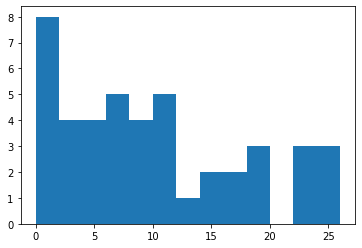

In [415]:
sbins=[i for i in range(0,28,2)]
plt.hist(all_stats_table['Marginal_States'], bins=sbins)
plt.show()

In [413]:
all_stats_table['Vote%_margin_states'].mean(), all_stats_table['Vote%_margin_states'].median()

(0.057273903962107416, 0.03819990786553154)

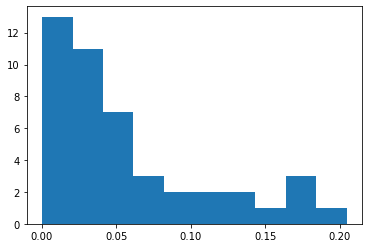

In [369]:
plt.hist(all_stats_table['Vote%_margin_states'], bins=10)
plt.show()

In [354]:
all_stats_table['EC Margin%'] = all_stats_table['Electoral Margin']/all_stats_table['Total Electoral votes']

In [329]:
all_stats_table['Vote Margin %'].mean()

0.08697609053753677

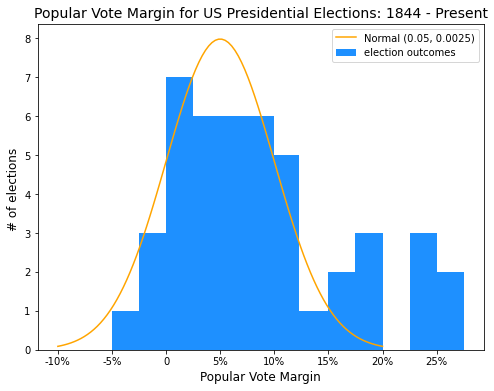

In [406]:
import scipy.stats as stats
import math

mean = 0.05
variance = 0.0025
sigma = math.sqrt(variance)
x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)

bins = [-0.10, -0.05, -0.025, 0 , 0.025, 0.05, 0.075, 0.1, 0.1225, 0.15, 0.175, 0.20, 0.225, 0.25, 0.275]
plt.figure(figsize=(8,6))
plt.title("Popular Vote Margin for US Presidential Elections: 1844 - Present",fontsize=14)
plt.hist(all_stats_table['Vote Margin %'], bins = bins, label="election outcomes",color="dodgerblue")
plt.plot(x, stats.norm.pdf(x, mean, sigma), label ="Normal (0.05, 0.0025)",color="orange")
plt.xlabel('Popular Vote Margin',fontsize = 12)
plt.ylabel('# of elections ',fontsize = 12)
plt.xticks(ticks=[-0.10,-0.05,0,0.05,0.1,0.15,0.2,0.25],labels=['-10%','-5%','0', '5%','10%', '15%', '20%','25%'])
plt.legend()
plt.show()

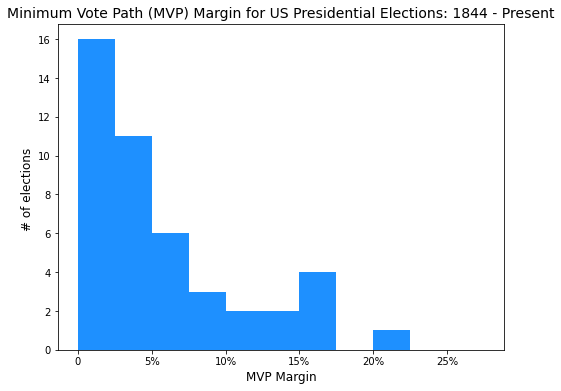

In [424]:
bins = [0 , 0.025, 0.05, 0.075, 0.1, 0.1225, 0.15, 0.175, 0.20, 0.225, 0.25, 0.275]
plt.figure(figsize=(8,6))
plt.title("Minimum Vote Path (MVP) Margin for US Presidential Elections: 1844 - Present",fontsize=14)
plt.hist(all_stats_table['Vote%_margin_states'], bins = bins,color="dodgerblue")
plt.xlabel('MVP Margin',fontsize = 12)
plt.ylabel('# of elections ',fontsize = 12)
plt.xticks(ticks=[0,0.05,0.1,0.15,0.2,0.25],labels=['0', '5%','10%', '15%', '20%','25%'])
plt.show()

In [ ]:
Dem = all_stats_table[all_stats_table['Party']=='Democrat']
Rep = all_stats_table[all_stats_table['Party']=='Republican']
Whig = all_stats_table[all_stats_table['Party']=='Whig']
Trump = all_stats_table.loc[2016]
Biden = all_stats_table.loc[2020]

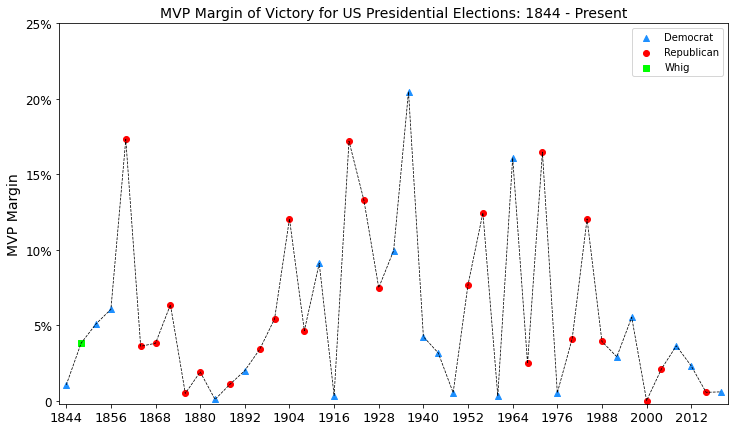

In [462]:
years = [x for x in range(1844, 2020, 12)]
plt.figure(figsize=(12,7))
plt.ylim(-.002,0.25)
plt.xticks(years,fontsize=13)
plt.yticks(ticks=[0,0.05,0.10,0.15,0.20,0.25],labels=['0', '5%','10%', '15%', '20%','25%'],fontsize=12)
plt.title("MVP Margin of Victory for US Presidential Elections: 1844 - Present",fontsize=14)
plt.xlim(1842, 2022)
#plt.grid(axis="y")
plt.plot(all_stats_table['Year'],all_stats_table['Vote%_margin_states'],linewidth=.75,color = 'black', linestyle='--')
plt.scatter(Dem['Year'],Dem['Vote%_margin_states'], color = 'dodgerblue', label='Democrat', marker='^')
plt.scatter(Rep['Year'],Rep['Vote%_margin_states'], color = 'red', label="Republican")
plt.scatter(Whig['Year'],Whig['Vote%_margin_states'], color = 'lime', label="Whig", marker = 's')
plt.ylabel("MVP Margin",fontsize=14)
plt.legend(loc="upper right")
plt.show()

In [171]:
elections_summary.shape, elections_summary[elections_summary['Vote %']>=0.50].shape

((45, 17), (27, 17))

In [172]:
27/45

0.6

In [178]:
elections_summary['Vote %'].median()

0.5105822711811422

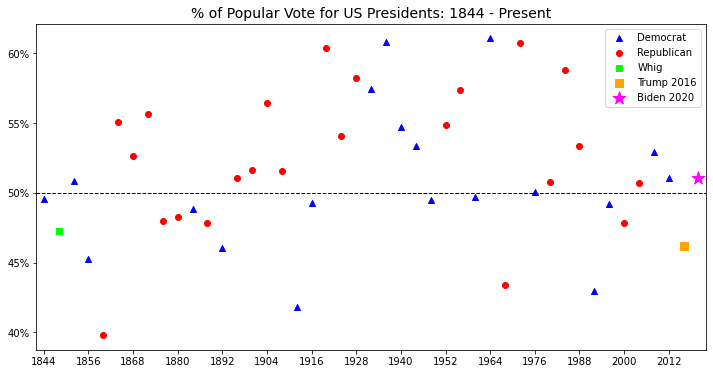

In [342]:
#years = [x for x in range(1844, 2020, 12)]
plt.figure(figsize=(12,6))
plt.xticks(years)
plt.yticks(ticks=[0.4,0.45,0.5,0.55,0.6],labels=['40%', '45%','50%', '55%', '60%'])
plt.title("% of Popular Vote for US Presidents: 1844 - Present",fontsize=14)
plt.xlim(1842, 2022)
plt.scatter(Dem['Year'],Dem['Vote %'],  color="blue", marker="^", label = "Democrat")
plt.scatter(Rep['Year'],Rep['Vote %'],  color="red", label = "Republican")
plt.scatter(Whig['Year'],Whig['Vote %'],  color="lime", label="Whig",marker="s")
plt.scatter(Trump['Year'],Trump['Vote %'],  color="orange", label="Trump 2016",marker="s",s=80)
plt.scatter(Biden['Year'],Biden['Vote %'],  color="fuchsia", label="Biden 2020",marker="*",s=180)
plt.axhline(y=0.5, color = 'black', linewidth=1, linestyle='--')
plt.legend()
plt.show()

In [176]:
elections_summary['Vote Margin %'].mean()

0.08697609053753677

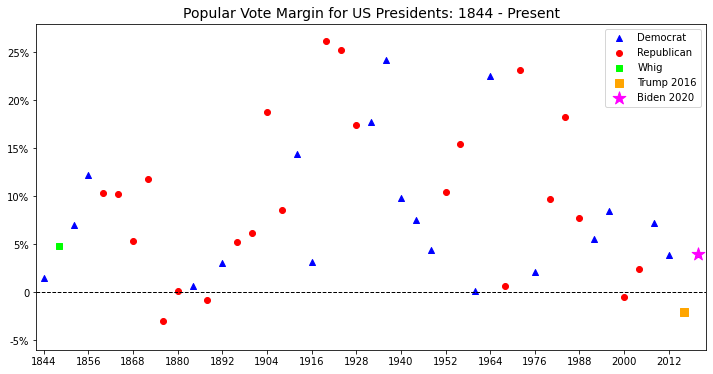

In [346]:
years = [x for x in range(1844, 2020, 12)]
plt.figure(figsize=(12,6))
plt.xticks(years)
plt.title("Popular Vote Margin for US Presidents: 1844 - Present",fontsize=14)
plt.xlim(1842, 2022)
plt.ylim(-0.06,0.28)
plt.yticks(ticks=[-0.05,0,0.05,0.1,0.15,0.2,0.25],labels=['-5%','0', '5%','10%', '15%', '20%','25%'])
plt.scatter(Dem['Year'],Dem['Vote Margin %'],  color="blue", marker="^", label = "Democrat")
plt.scatter(Rep['Year'],Rep['Vote Margin %'],  color="red", label = "Republican")
plt.scatter(Whig['Year'],Whig['Vote Margin %'],  color="lime", label="Whig",marker="s")
plt.scatter(Trump['Year'],Trump['Vote Margin %'],  color="orange", label="Trump 2016",marker="s",s=80)
plt.scatter(Biden['Year'],Biden['Vote Margin %'],  color="fuchsia", label="Biden 2020",marker="*",s=180)
plt.axhline(y=0, color = 'black', linewidth=1, linestyle='--')
plt.legend()
plt.show()

In [ ]:
elections_summary.to_excel("All_presidential_summary_stats.xlsx") 

In [258]:
marginal_votes['Marginal_States'].value_counts().sort_index()

1     8
2     1
3     3
4     2
5     2
6     2
7     3
8     4
10    2
11    3
13    1
15    2
17    2
18    2
19    1
22    1
23    2
25    2
26    1
29    1
Name: Marginal_States, dtype: int64

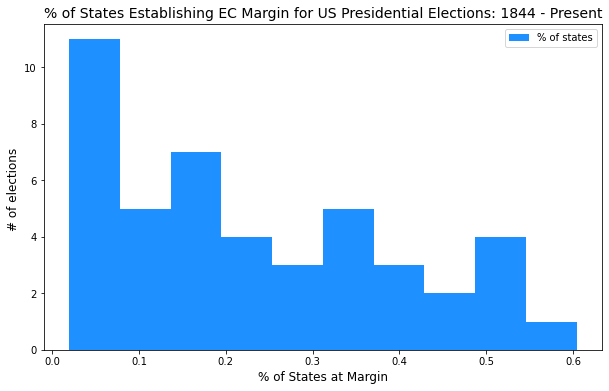

In [325]:
plt.figure(figsize=(10,6))
plt.title("% of States Establishing EC Margin for US Presidential Elections: 1844 - Present",fontsize=14)
plt.hist(marginal_votes['marginal_states_%'], bins = 10, label="% of states",color= "dodgerblue")
#plt.plot(x, stats.norm.pdf(x, mean, sigma), label ="Normal (0.05, 0.0025)")
plt.xlabel('% of States at Margin',fontsize = 12)
plt.ylabel('# of elections ',fontsize = 12)
plt.legend()
plt.show()

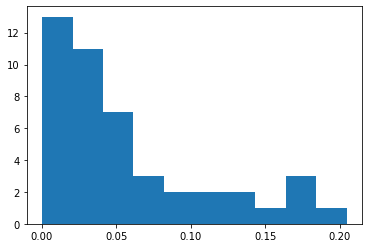

In [401]:
plt.hist(all_stats_table['Vote%_margin_states'], bins=10)
plt.show()

In [402]:
all_stats_table['Vote%_margin_states'].median()

0.03819990786553154

In [397]:
all_stats_table['Vote%_margin_states'].corr(all_stats_table['Vote Margin %'])

0.9066420101080354

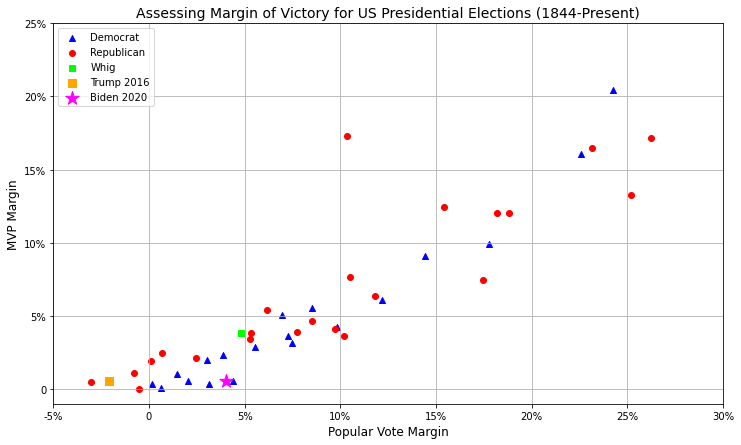

In [450]:
plt.figure(figsize=(12,7))
plt.title("Assessing Margin of Victory for US Presidential Elections (1844-Present)",fontsize=14)
plt.ylim(-.01, 0.25)
plt.xlim(-.05, 0.30)
plt.scatter(Dem['Vote Margin %'],Dem['Vote%_margin_states'],  color="blue", marker="^", label = "Democrat")
plt.scatter(Rep['Vote Margin %'],Rep['Vote%_margin_states'],  color="red", label = "Republican")
plt.scatter(Whig['Vote Margin %'],Whig['Vote%_margin_states'],  color="lime", label="Whig",marker="s")
plt.scatter(Trump['Vote Margin %'],Trump['Vote%_margin_states'],  color="orange", label="Trump 2016",marker="s",s=80)
plt.scatter(Biden['Vote Margin %'],Biden['Vote%_margin_states'],  color="fuchsia", label="Biden 2020",marker="*",s=200)
#plt.axhline(y=0, color = 'black', linewidth=1, linestyle='--')
plt.xlabel("Popular Vote Margin",fontsize=12)
plt.ylabel("MVP Margin",fontsize=12)
plt.grid(which="both")
plt.xticks(ticks=[-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3],labels=['-5%','0', '5%','10%', '15%', '20%','25%','30%'])
plt.yticks(ticks=[0,0.05,0.1,0.15,0.2,0.25],labels=['0', '5%','10%', '15%', '20%','25%'])
plt.legend(loc="upper left")
plt.show()

In [379]:
all_stats_table['Vote Margin %'].mean(), all_stats_table['Vote Margin %'].median()

(0.08697609053753677, 0.07253367082753562)

In [380]:
all_stats_table['EC Margin%'].mean(), all_stats_table['EC Margin%'].median()

(0.43339903632093874, 0.3754646840148699)

In [391]:
all_stats_table['EC Margin%'].corr(all_stats_table['Vote Margin %'])

0.7457824142221152

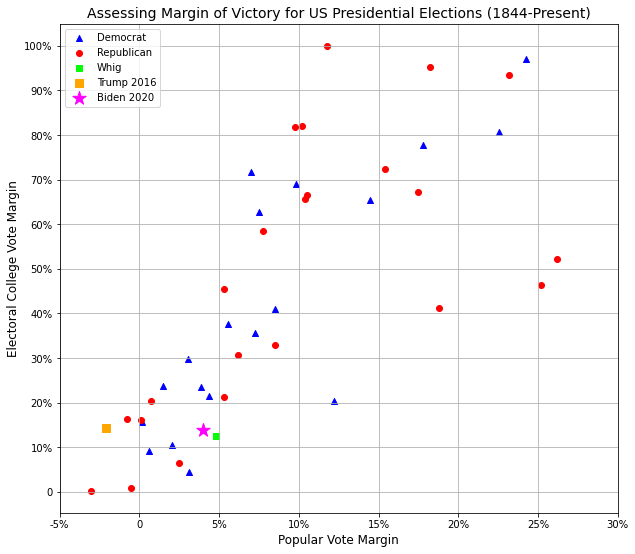

In [396]:
plt.figure(figsize=(10,9))
plt.title("Assessing Margin of Victory for US Presidential Elections (1844-Present)",fontsize=14)
#plt.ylim(-.01, 0.25)
plt.xlim(-.05, 0.30)
plt.scatter(Dem['Vote Margin %'],Dem['EC Margin%'],  color="blue", marker="^", label = "Democrat")
plt.scatter(Rep['Vote Margin %'],Rep['EC Margin%'],  color="red", label = "Republican")
plt.scatter(Whig['Vote Margin %'],Whig['EC Margin%'],  color="lime", label="Whig",marker="s")
plt.scatter(Trump['Vote Margin %'],Trump['EC Margin%'],  color="orange", label="Trump 2016",marker="s",s=80)
plt.scatter(Biden['Vote Margin %'],Biden['EC Margin%'],  color="fuchsia", label="Biden 2020",marker="*",s=200)
#plt.axhline(y=0, color = 'black', linewidth=1, linestyle='--')
plt.xlabel("Popular Vote Margin",fontsize=12)
plt.ylabel('Electoral College Vote Margin',fontsize=12)
plt.grid(which="both")
plt.xticks(ticks=[-0.05,0,0.05,0.1,0.15,0.2,0.25,0.3],labels=['-5%','0', '5%','10%', '15%', '20%','25%','30%'])
plt.yticks(ticks=[0,0.1,0.2,0.3,0.4,0.5, 0.6, 0.7, 0.8,0.9, 1.0],labels=['0', '10%','20%', '30%', '40%','50%',\
                                                                        '60%','70%','80%','90%','100%'])
plt.legend(loc="upper left")
plt.show()

In [416]:
all_stats_table['EC Margin%'].nlargest(n=10)

Year
1872    1.000000
1936    0.969868
1984    0.951673
1972    0.934944
1864    0.819742
1980    0.817844
1964    0.806691
1932    0.777778
1956    0.723164
1852    0.717172
Name: EC Margin%, dtype: float64

In [418]:
all_stats_table['Vote Margin %'].nlargest(n=15)

Year
1920    0.262168
1924    0.252163
1936    0.242539
1972    0.231599
1964    0.225798
1904    0.188037
1984    0.182163
1932    0.177578
1928    0.174680
1956    0.154251
1912    0.144527
1856    0.121768
1872    0.117940
1952    0.105002
1860    0.103660
Name: Vote Margin %, dtype: float64

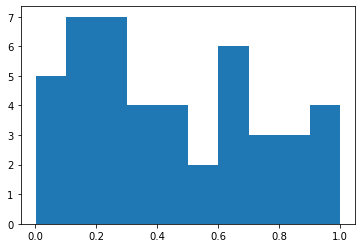

In [390]:
plt.hist(all_stats_table['EC Margin%'], bins=10)
plt.show()

In [ ]:
class State(object):
    def __init__(self, name, EVs, vote_margin, vote_cost):
        self.name = name
        self.EVs = EVs
        self.vote_margin = vote_margin
        
    def State_name(self):
        return self.name
    
    def State_EVs(self):
        return self.EVS